# The Stick and Ball Geometry

The ``SpheresAndCylinders`` class contains an assortment of pore-scale models that generate geometrical information assuming the pores are spherical and throats are cylindrical. 

The ``SpheresAndCylinders`` is a perfect starting point for generating your own custom geometry.  In fact, it's likely that only the calculation of 'pore.diameter' would need to be changed.  By default the 'pore.diameter' values are drawn from a random distribution which is not very realistic.  Luckily, it's easy to update the model used to calculate diameter, and then propagate this change to all the dependent values (i.e. 'pore.volume'), as illustrated below.

In [1]:
import openpnm as op
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt

In [2]:
pn = op.network.Cubic(shape=[20, 20, 20], spacing=100)

> The spacing of the above network is in um for this example to make values easier to read, but in general you should always use SI

Now we can create a geometry object based on the ``SpheresAndCylinders``:

In [3]:
geo = op.geometry.SpheresAndCylinders(network=pn, pores=pn.Ps, throats=pn.Ts)

As can be seen by printing it, there are quite a few geometrical properties already added to this object.  Defining these manually would have been a pain, so it's a good idea to start with this class then alter the few models that need it:

In [4]:
print(geo)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
openpnm.geometry.SpheresAndCylinders : geo_01
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#     Properties                                    Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1     pore.cross_sectional_area                      8000 / 8000 
2     pore.diameter                                  8000 / 8000 
3     pore.max_size                                  8000 / 8000 
4     pore.seed                                      8000 / 8000 
5     pore.volume                                    8000 / 8000 
6     throat.cross_sectional_area                   22800 / 22800
7     throat.diameter                               22800 / 22800
8     throat.diffusive_size_factors.pore1           22800 / 22800
9     throat.diffusive_size_factors.pore2           22800 / 22800
10    throat.diffusive_size_factors.th...           22800 

The pore size distribution on the ``SpheresAndCylinders`` is probably the more likely thing to change, since it is a random (i.e. uniform distribution) as shown below:

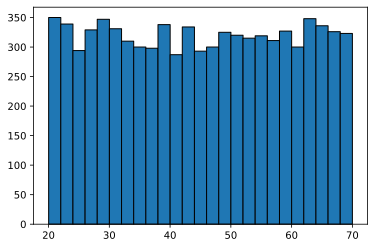

In [5]:
fig = plt.hist(geo['pore.diameter'], bins=25, edgecolor='k')

The models on the ``geo`` object can be seen by printing them:

In [6]:
print(geo.models)

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
#   Property Name                       Parameter                 Value
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1   pore.seed                           model:                    random
                                        element:                  pore
                                        num_range:                [0.2, 0.7]
                                        seed:                     None
                                        regeneration mode:        normal
―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
2   pore.max_size                       model:                    largest_sphere
                                        iters:                    10
                                        fixed_diameter:           pore.fixed_diameter
                                        regeneration mode:        nor

In this tutorial we will change how pore sizes are calculated.  We can do this by assigning a new pore-scale model for 'pore.diameter'.  Let's use  Gaussian distribution:

In [7]:
f = op.models.geometry.pore_size.normal
geo.add_model(propname='pore.diameter', 
              model=f,
              loc=50, scale=10)

This model is automatically run when it's assigned, so we can inspect the new pore diameter values:

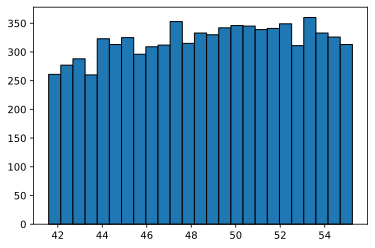

In [8]:
fig = plt.hist(geo['pore.diameter'], bins=25, edgecolor='k')

The above distribution does not look very much like a Gaussian distribution.  This is because the 'pore.seed' values are truncated between 0.2 and 0.7:

In [9]:
print(geo.models['pore.seed'])

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Property Name             Parameter                 Value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
pore.seed                 model:                    random
                          element:                  pore
                          num_range:                [0.2, 0.7]
                          seed:                     None
                          regeneration mode:        normal
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


We should change this to a wider range to capture more pores on the "tails", then call ``regenerate_models``, which will not only regenerate the random numbers, but all the other properties that depend on it such as 'pore.diameter', 'pore.volume', and so on:

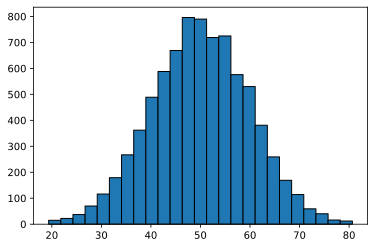

In [10]:
geo.models['pore.seed']['num_range'] = [0.001, 0.999]
geo.regenerate_models()
fig = plt.hist(geo['pore.diameter'], bins=25, edgecolor='k')

A detailed example of adjusting pore-size distributions is given [here](./adjusting_pore_size_distributions.ipynb)